In [32]:
import os
from os import path
import sys
import string

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import mpld3
%matplotlib inline

In [34]:
BASE_DIR = "/Users/susmitadatta/Metis/Proj04/"

In [35]:
sys.path.append(path.abspath(BASE_DIR+'NLP/SupportModules/'))
import data_transform_module as dtmod
import book_module as bmod

In [14]:
BOOK_PATH = BASE_DIR+'NLP/BookData/'

### Book sentiment analysis

#### Book 1

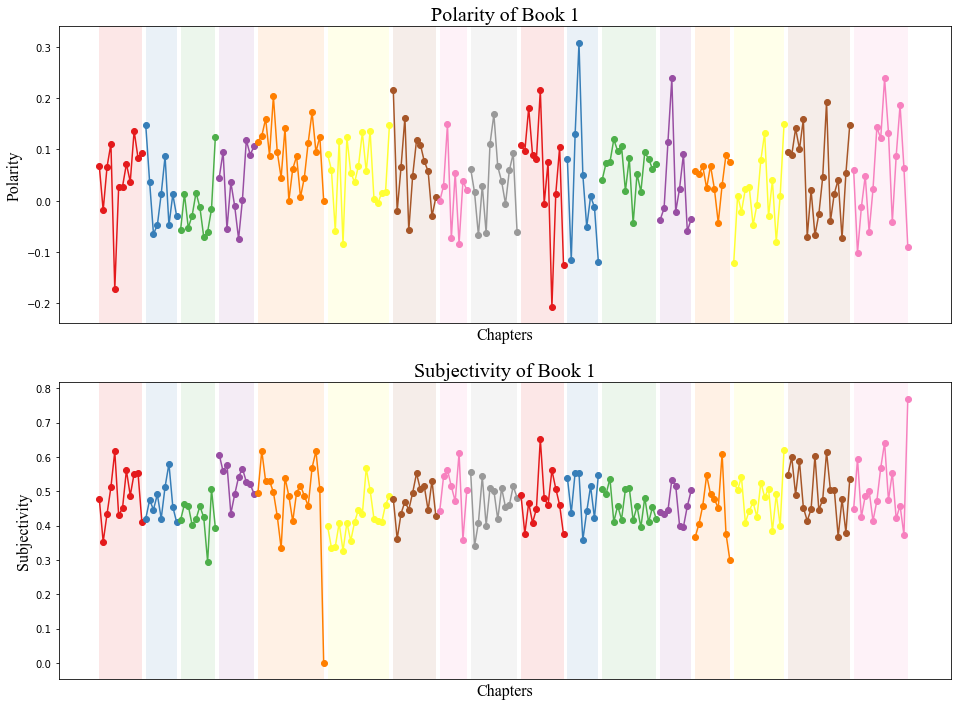

In [27]:
seq = 1
book_dict = dtmod.unpickleSomething(BOOK_PATH, "book{}_chapters.p".format(seq))
book = bmod.Book(book_dict, 400)
n_chaps = book.n_chaps
book_info = book.chunk_info
book_polarity, book_subjectivity, book_chunk_seq = bmod.prepData_plotSentiment(book_info)
bmod.plotSentiment(book_polarity, book_subjectivity, book_chunk_seq, seq)

**INTERACTIVE Plot**  
Make interactive polarity plot. Lets a user place cursor on a dot. The chapter and segment number pops-up. The user can enter the chapter and segment number in the cell below the plot to view the text segment.

In [26]:
def interactive_plotPolarity(pol, sub, x_vals, seq):    
    # define color space
    cs  = cm.Set1(np.arange(9)/9)
    while cs.shape[0] <= len(x_vals):
        cs = np.concatenate((cs, cs), axis=0)
    cs = cs[0: len(x_vals)]
    
    fig, axs = plt.subplots(figsize=(14,6))
    

    # polarity
    for i in range(0, len(x_vals)):
        # create a function to get a list of pop-up information for each segment
        pop_up_vals = list(range(len(x_vals[i])))
        pop_up_chunk_id = list(range(len(x_vals[i])))
        pop_up_chap_number = ["Ch .{}".format(i+1)]*len(x_vals[i])
        for t in range(len(pop_up_chunk_id)):
            id_val = pop_up_chunk_id[t]+1
            pop_up_chap_number[t] = pop_up_chap_number[t]+', Seg .{}'.format(id_val)
            
        lines = axs.plot(x_vals[i], pol[i], color=cs[i], marker='s')
        mpld3.plugins.connect(fig, 
                              mpld3.plugins.PointLabelTooltip(lines[0],
                                                              labels=pop_up_chap_number) ) 
    axs.set_title('Polarity of Book {}'.format(seq), fontsize=20, fontname="Times New Roman")
    axs.set_ylabel('Polarity', fontsize=16, fontname="Times New Roman")
    axs.set_xlabel('Chapters', fontsize=16, fontname="Times New Roman")
    axs.set_xticks([])
    
    mpld3.enable_notebook()

In [28]:
def extract_chapterSegment(chap_id, seg_id):
    chap_dict = book_info[chap_id-1]
    print(chap_dict['chunk_text'][seg_id-1])

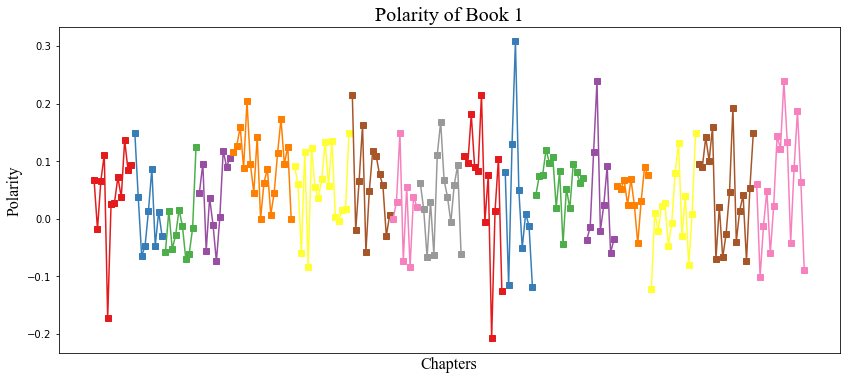

In [37]:
seq = 1
book_dict = dtmod.unpickleSomething(BOOK_PATH, "book{}_chapters.p".format(seq))
book = bmod.Book(book_dict, 400)
n_chaps = book.n_chaps
book_info = book.chunk_info
book_polarity, book_subjectivity, book_chunk_seq = bmod.prepData_plotSentiment(book_info)

### make plot interactive
interactive_plotPolarity(book_polarity, book_subjectivity, book_chunk_seq, seq) 

In [31]:
chap_id = 11
seg_id = 4
extract_chapterSegment(chap_id, seg_id)

their scarlet quidditch robes slytherin would be playing in green wood cleared his throat for silence okay men he said and women said chaser angelina johnson and women wood agreed this is it the big one said fred weasley the one we have all been waiting for said george we know oliver s speech by heart fred told harry we were on the team last year shut up you two said wood this is the best team gryffindor s had in years we are going to win i know it he glared at them all as if to say or else right it is time good luck all of you harry followed fred and george out of the locker room and hoping his knees were not going to give way walked onto the field to loud cheers madam hooch was refereeing she stood in the middle of the field waiting for the two teams her broom in her hand now i want a nice fair game all of you she said once they were all gathered around her harry noticed that she seemed to be speaking particularly to the slytherin captain marcus flint a sixth year harry thought flint